In [1]:
import os
import sys

import numpy as np
import pandas as pd

import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
# Load Data
df = pd.read_csv("car_fuel_efficiency.csv")
df.head()

,engine_displacement,num_cylinders,horsepower,vehicle_weight,acceleration,model_year,origin,fuel_type,drivetrain,num_doors,fuel_efficiency_mpg
0,170,3.0,159.0,3413.433759,17.7,2003,Europe,Gasoline,All-wheel drive,0.0,13.231729
1,130,5.0,97.0,3149.664934,17.8,2007,USA,Gasoline,Front-wheel drive,0.0,13.688217
2,170,NaN,78.0,3079.038997,15.1,2018,Europe,Gasoline,Front-wheel drive,0.0,14.246341
3,220,4.0,NaN,2542.392402,20.2,2009,USA,Diesel,All-wheel drive,2.0,16.912736
4,210,1.0,140.0,3460.870990,14.4,2009,Europe,Gasoline,All-wheel drive,2.0,12.488369


In [3]:
# COLUMNS TO USE
SELECT_COLS = [
    'engine_displacement',
    'horsepower',
    'vehicle_weight',
    'model_year',
    'fuel_efficiency_mpg',
]

In [4]:
X_COLS = [
    'engine_displacement',
    'horsepower',
    'vehicle_weight',
    'model_year',
]

Y_COL = ['fuel_efficiency_mpg']

### Distribution of fuel efficiency 

- Normal Distribution IS IT?

<Axes: xlabel='fuel_efficiency_mpg', ylabel='Count'>

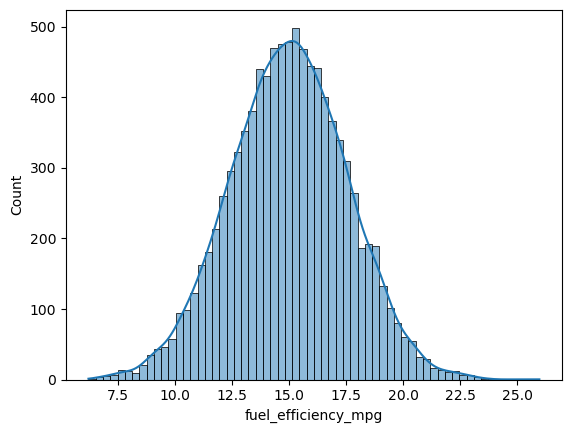

In [5]:
sns.histplot(data=df, x="fuel_efficiency_mpg", kde=True)

## Q1

In [6]:
df[SELECT_COLS].isnull().sum()

engine_displacement      0
horsepower             708
vehicle_weight           0
model_year               0
fuel_efficiency_mpg      0
dtype: int64

## Q2

In [7]:
df[SELECT_COLS].describe()

,engine_displacement,horsepower,vehicle_weight,model_year,fuel_efficiency_mpg
count,9704.000000,8996.000000,9704.000000,9704.000000,9704.000000
mean,199.708368,149.657292,3001.280993,2011.484027,14.985243
std,49.455319,29.879555,497.894860,6.659808,2.556468
min,10.000000,37.000000,952.681761,2000.000000,6.200971
25%,170.000000,130.000000,2666.248985,2006.000000,13.267459
50%,200.000000,149.000000,2993.226296,2012.000000,15.006037
75%,230.000000,170.000000,3334.957039,2017.000000,16.707965
max,380.000000,271.000000,4739.077089,2023.000000,25.967222


## Regression Functions 

- prepare and split
- train linear regression
- RMSE eval
- prediction

In [8]:
np.random.seed(2)

In [9]:
def split_dataset(df, y_col):
    
    n = len(df)

    n_val = int(0.2 * n)
    n_test = int(0.2 * n)
    n_train = n - (n_val + n_test)
    
    idx = np.arange(n)
    np.random.shuffle(idx)
    
    df_shuffled = df.iloc[idx]
    
    df_train = df_shuffled.iloc[:n_train].copy()
    df_val = df_shuffled.iloc[n_train:n_train+n_val].copy()
    df_test = df_shuffled.iloc[n_train+n_val:].copy()

    y_train = df_train[y_col].values
    y_val = df_val[y_col].values
    y_test = df_test[y_col].values

    return df_train, y_train, df_val, y_val, df_test, y_test

In [10]:
def prepare_X(df, base, fillna_val=0):
    df_num = df[base]
    df_num = df_num.fillna(fillna_val)
    X = df_num.values
    return X

In [11]:
def train_linear_regression(X, y):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w = XTX_inv.dot(X.T).dot(y)
    
    return w[0], w[1:]

In [12]:
def train_linear_regression_reg(X, y, r=0.0):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    reg = r * np.eye(XTX.shape[0])
    XTX = XTX + reg

    XTX_inv = np.linalg.inv(XTX)
    w = XTX_inv.dot(X.T).dot(y)
    
    return w[0], w[1:]

In [13]:
def rmse(y, y_pred):
    error = y_pred - y
    mse = (error ** 2).mean()
    return np.sqrt(mse)

In [14]:
def eval_pipeline(dft, yt, dfv, yv, cols, fillna_val=0, reg=0):
    
    X_train = prepare_X(dft, cols, fillna_val)
    X_val = prepare_X(dfv, cols, fillna_val)

    # training
    w_0, w = train_linear_regression_reg(X_train, y_train, r=reg)


    # measure error
    y_pred = w_0 + X_train.dot(w)
    err_train = rmse(yt, y_pred)
    print('train error: ', round(err_train, 2))

    y_pred = w_0 + X_val.dot(w)
    err_val = rmse(yv, y_pred)
    print('val error: ', round(err_val, 2))

    return w_0, w, err_val

## Q3

In [15]:
df_train, y_train, df_val, y_val, df_test, y_test = split_dataset(df, y_col=Y_COL)

### Train with 0 fill 

In [16]:
w_0, w, err_val = eval_pipeline(df_train, y_train, df_val, y_val, X_COLS, fillna_val=0)

train error:  0.52
val error:  0.52


### Train with mean fill

In [17]:
mean_val_fill = df_train['horsepower'].mean()

In [18]:
w_0, w, err_val= eval_pipeline(df_train, y_train, df_val, y_val, X_COLS, fillna_val=mean_val_fill)

train error:  0.46
val error:  0.47


## Q4

In [19]:
for r in [0, 0.01, 0.1, 1, 5, 10, 100]:
    print('For reg=', r)
    w_0, w, err_val = eval_pipeline(df_train, y_train, df_val, y_val, X_COLS, fillna_val=0, reg=r)
    print('=' * 50)

For reg= 0
train error:  0.52
val error:  0.52
For reg= 0.01
train error:  0.52
val error:  0.52
For reg= 0.1
train error:  0.52
val error:  0.53
For reg= 1
train error:  0.53
val error:  0.53
For reg= 5
train error:  0.53
val error:  0.53
For reg= 10
train error:  0.53
val error:  0.53
For reg= 100
train error:  0.53
val error:  0.53


## Q5

In [20]:
score_list = []
for seed_val in np.linspace(0, 9, 10):
    print('set np random seed val to ', seed_val)
    np.random.seed(int(seed_val))
    df_train, y_train, df_val, y_val, df_test, y_test = split_dataset(df, y_col=Y_COL)
    w_0, w, err_val = eval_pipeline(df_train, y_train, df_val, y_val, X_COLS, fillna_val=0, reg=0)
    score_list.append(err_val)

set np random seed val to  0.0
train error:  0.52
val error:  0.52
set np random seed val to  1.0
train error:  0.51
val error:  0.52
set np random seed val to  2.0
train error:  0.52
val error:  0.52
set np random seed val to  3.0
train error:  0.52
val error:  0.52
set np random seed val to  4.0
train error:  0.52
val error:  0.51
set np random seed val to  5.0
train error:  0.52
val error:  0.53
set np random seed val to  6.0
train error:  0.51
val error:  0.53
set np random seed val to  7.0
train error:  0.52
val error:  0.51
set np random seed val to  8.0
train error:  0.52
val error:  0.51
set np random seed val to  9.0
train error:  0.52
val error:  0.51


In [21]:
round(np.std(score_list), 3)

0.007

## Q6

In [22]:
np.random.seed(9)
df_train, y_train, df_val, y_val, df_test, y_test = split_dataset(df, y_col=Y_COL)

In [27]:
df_val_ = pd.concat([df_val, df_test])
y_val_ = np.vstack((y_val, y_test))

In [28]:
w_0, w, err_val = eval_pipeline(df_train, y_train, df_val_, y_val_, X_COLS, fillna_val=0, reg=0.001)

train error:  0.52
val error:  0.51
